In [28]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

#%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions
from scipy.stats import levene

from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [29]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Problem 1**
A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.

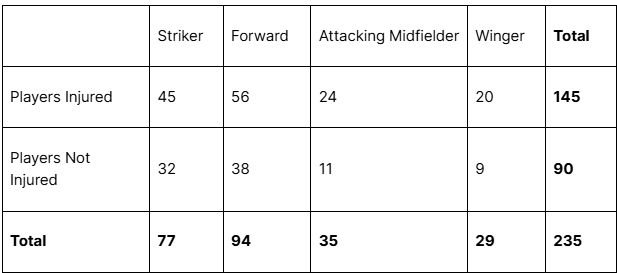

Based on the above data, answer the following questions.

1.1 What is the probability that a randomly chosen player would suffer an injury?

In [ ]:
Total_injured_player = 145
Total_Player = 235
P_Injury= Total_injured_player/Total_Player
print('Probability of randomly chosen suffers an injury is',round(P_Injury,5))

Probability of randomly chosen suffers an injury is 0.61702


1.2 What is the probability that a player is a forward or a winger?

In [ ]:
Total_Player = 235
Forward = 94
Winger = 29
P_Forward = Forward/Total_Player
P_Winger = Winger/Total_Player
P_Forward_Winger = P_Forward+P_Winger
print('Probability that a player is a forward or a winger',round(P_Forward_Winger,5))

Probability that a player is a forward or a winger 0.5234


1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [ ]:
#Striker and injury is not mutually exclusive and occur simultaneously
Striker_injury = 45
Total_Player = 235
P_injury_striker = Striker_injury/Total_Player
print('Probability that a randomly chosen player plays in a striker position and has a foot injury',round(P_injury_striker,5))

Probability that a randomly chosen player plays in a striker position and has a foot injury 0.19149


1.4 What is the probability that a randomly chosen injured player is a striker?

In [ ]:
Total_injured_player = 145
Injured_striker =45
P_injured_striker = Injured_striker/Total_injured_player
print('Probability that a randomly chosen injured player is a striker',round(P_injured_striker,5))


Probability that a randomly chosen injured player is a striker 0.31034


#Problem 2
The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information;

2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

In [ ]:
# import the required function
from scipy.stats import norm
mu=5
sigma=1.5
Prob_less_than_317 = norm.cdf(3.17,loc=mu,scale=sigma)
Prob_less_than_317

0.11123243744783456

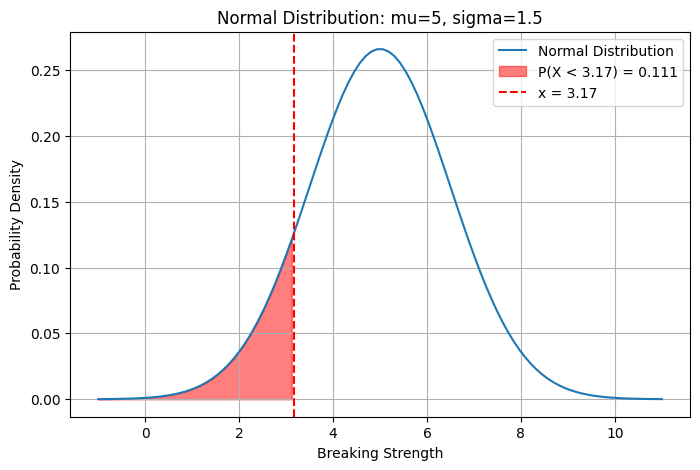

In [ ]:
mu = 5
sigma = 1.5
x = 3.17


# Calculate probability
prob_less_than_x = norm.cdf(x, loc=mu, scale=sigma)

# Generate x-values for plotting the PDF
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

# Calculate PDF values
pdf_values = norm.pdf(x_values, loc=mu, scale=sigma)

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x_values, pdf_values, label='Normal Distribution')
plt.fill_between(x_values, pdf_values, where=(x_values <= x),color='r', alpha=0.5, label=f'P(X < {x:.2f}) = {prob_less_than_x:.3f}')
plt.axvline(x, color='red', linestyle='--', label=f'x = {x:.2f}')
plt.xlabel('Breaking Strength')
plt.ylabel('Probability Density')
plt.title(f'Normal Distribution: mu={mu}, sigma={sigma}')
plt.legend()
plt.grid(True)
plt.show()

2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

In [ ]:
# import the required function
from scipy.stats import norm
mu=5
sigma=1.5
Prob_atleast_316 = norm.cdf(3.6,loc=mu,scale=sigma)
breaking_strength=1-Prob_atleast_316
breaking_strength

0.8246760551477705

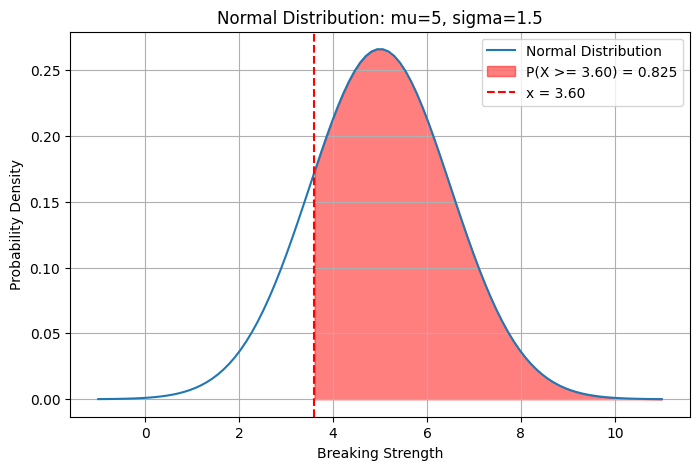

In [ ]:
mu = 5
sigma = 1.5
x = 3.6


# Calculate probability
breaking_strength = 1-norm.cdf(x, loc=mu, scale=sigma)

# Generate x-values for plotting the PDF
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

# Calculate PDF values
pdf_values = norm.pdf(x_values, loc=mu, scale=sigma)

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x_values, pdf_values, label='Normal Distribution')
plt.fill_between(x_values, pdf_values, where=(x_values >= x),color='r', alpha=0.5, label=f'P(X >= {x:.2f}) = {breaking_strength:.3f}')
plt.axvline(x, color='red', linestyle='--', label=f'x = {x:.2f}')
plt.xlabel('Breaking Strength')
plt.ylabel('Probability Density')
plt.title(f'Normal Distribution: mu={mu}, sigma={sigma}')
plt.legend()
plt.grid(True)
plt.show()

2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [ ]:
# import the required function
from scipy.stats import norm
mu=5
sigma=1.5
Prob_55 = norm.cdf(5.5,loc=mu,scale=sigma)
Prob_5 = norm.cdf(5,loc=mu,scale=sigma)
breaking_strength_5_55 =Prob_55-Prob_5
breaking_strength_5_55

0.13055865981823633

In [ ]:
Prob_5


0.5

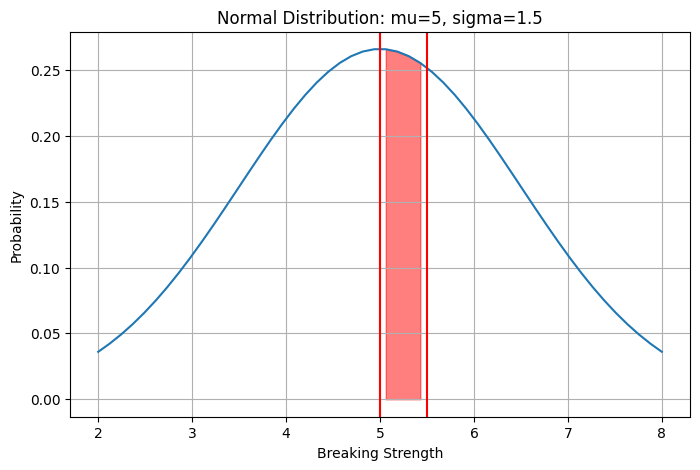

In [ ]:
mu=5
sigma=1.5
x = breaking_strength_5_55


x_values = np.linspace(mu-2*sigma,mu+2*sigma,50)
pdf_values = norm.pdf(x_values, mu, sigma)

#create plot
plt.figure(figsize=(8, 5))
plt.plot(x_values, pdf_values, label='Normal Distribution')
plt.fill_between(x_values, pdf_values, where=((x_values>=5)&(x_values <= 5.5)),alpha=0.5, color="r", label=f'P(X >= {x:.2f}) = {breaking_strength:.3f}')
plt.axvline(x=5, c="r")
plt.axvline(x=5.5, c="r")
plt.xlabel("Breaking Strength")
plt.ylabel("Probability")
plt.title(f'Normal Distribution: mu={mu}, sigma={sigma}')
plt.grid(True)
plt.show()







2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [ ]:
# import the required function
from scipy.stats import norm
mu=5
sigma=1.5
Prob_3 = norm.cdf(3,loc=mu,scale=sigma)
Prob_75 =norm.cdf(7.5,loc=mu,scale=sigma)
breaking_strength_not =1-(Prob_75-Prob_3)
breaking_strength_not

0.13900157199868257

In [ ]:
Prob_75

0.9522096477271853

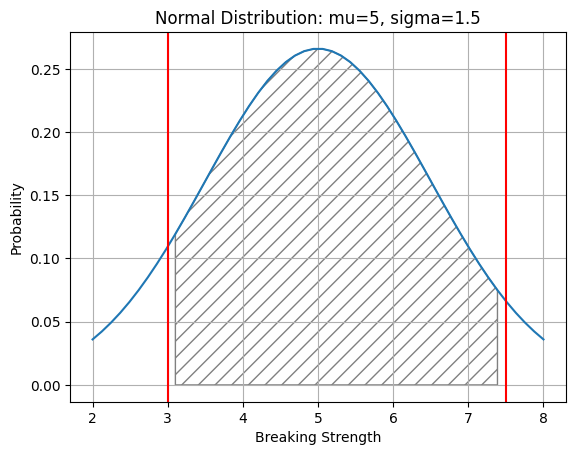

In [ ]:
x_values = np.linspace(mu-2*sigma,mu+2*sigma,50)
pdf_values = norm.pdf(x_values, mu, sigma)

plt.plot(x_values, pdf_values, label="Normal Distribution")
plt.axvline(x=3, c="r")
plt.axvline(x=7.5, c="r")
plt.fill_between(x_values, pdf_values, where=((x_values>=3)&(x_values <= 7.5)),facecolor="None", hatch="//", edgecolor="gray", label=f'P(X >= {x:.2f}) = {breaking_strength:.3f}')
plt.xlabel("Breaking Strength")
plt.ylabel("Probability")
plt.title(f'Normal Distribution: mu={mu}, sigma={sigma}')
plt.grid(True)
plt.show()

# Problem 3
Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);





3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Projects/Infer stats/Zingaro_Company.csv') #Read dataset

In [ ]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

In [ ]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [ ]:
df.shape

(75, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


0

In [ ]:
df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


## Step 1: Define null and alternative hypotheses

**Null and alternative hypotheses**

Let $\mu$ be the mean hardness of unploished stones

The null hypothesis can be written as

>$H_0: \mu < 150$

against the alternate hypothesis

>$H_a: \mu >= 150$

## Step 2: Select Appropriate test

The formulated hypotheses are population standard deviation unkown. Hence, we will with one sample T test to analyse the hypotheses and draw a conclusion.

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the hardness of unpolsihed is measured on a continuous scale.

*   Normally distributed population and Sample size > 30 - Yes, it is assumed that the population is normal and the sample size is 75 which is greater than 30.
*   Observations are from a simple random sample - Yes, we are informed that the collected sample a simple random sample.
*   Population standard deviation is known - No

Voila! We can use T-test for this problem.

### Let's find the p-value

In [ ]:
df.columns

Index(['Unpolished ', 'Treated and Polished'], dtype='object')

In [ ]:
#import the required functions
from scipy.stats import ttest_1samp

# calculate the test statistic and p-value
test_stat, p_value = ttest_1samp(df['Unpolished '], popmean = 150, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.9999582871300258


P value is greater than significance level of 0.05. Hence, We accept the null hypothesis that hardness of unpolished stone is less than 150

3.2 Is the mean hardness of the polished and unpolished stones the same?

## Step 1: Define null and alternative hypotheses

**Null and alternative hypotheses**

Let $\mu_1$ be the mean hardness of unploished stones and $\mu_2$ be the mean hardness of Treated and polished stones

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1\neq\mu_2$

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df['Unpolished '], df['Treated and Polished'], equal_var = False, alternative = 'two-sided')
print('The p-value is ' + str(p_value))

The p-value is 0.001588379295584306


P-Value is less than sifnificance level of 0.05 Hence, we fail to accept Null Hypothesis.

Mean hardness of polsihed and unpolished is not same

# Problem 4
Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

In [31]:
data1=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Python Projects/Infer stats/Dental Hardness data.xlsx') #Read dataset

In [32]:
df1= data1.copy()

In [ ]:
df1.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [ ]:
df1.shape

(90, 5)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [ ]:
df1.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


In [ ]:
df1['Dentist'].value_counts() #We see level of dentist

,count
Dentist,
1,18
2,18
3,18
4,18
5,18


In [ ]:
df1['Method'].value_counts() #we see three level of method used

,count
Method,
1,30
2,30
3,30


In [ ]:
df1['Alloy'].value_counts() #we see level of alloy used

,count
Alloy,
1,45
2,45


### Data preparation

In [40]:
Alloy1= df1[df1['Alloy']==1]
Alloy2= df1[df1['Alloy']==2]

<Axes: xlabel='Response'>

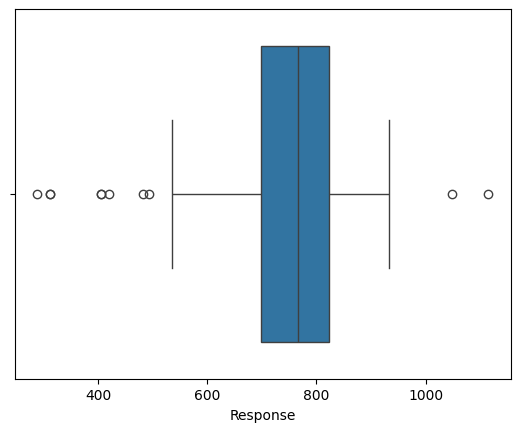

In [ ]:
sns.boxplot(df1,x='Response')

<ipython-input-10-d7f96865a9b2>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.catplot(data=df1, x='Dentist', y='Response', kind='point', hue='Method',col='Alloy',ci=False)


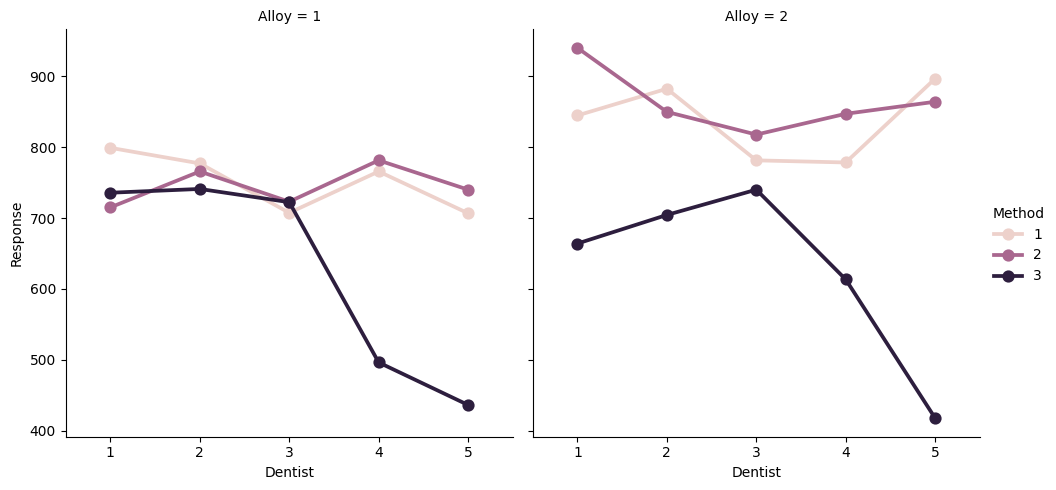

In [ ]:
sns.catplot(data=df1, x='Dentist', y='Response', kind='point', hue='Method',col='Alloy',ci=False)

##4.1 How does the hardness of implants vary depending on dentists?

## Visual inspection

<ipython-input-20-a479aa26e4bb>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(data=df1, x='Dentist', y='Response',hue='Alloy',ci=False) #dentist vs response


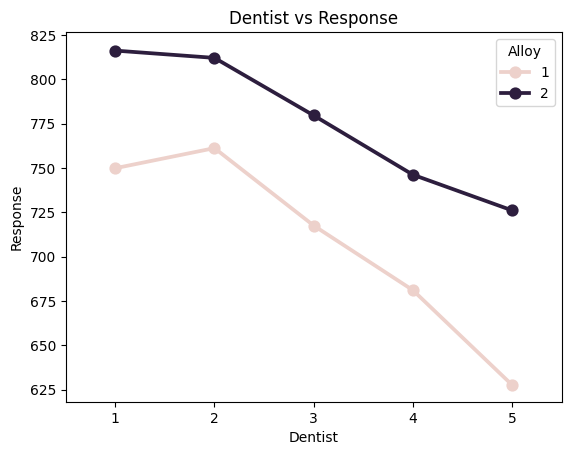

In [ ]:
sns.pointplot(data=df1, x='Dentist', y='Response',hue='Alloy',ci=False) #dentist vs response
plt.title('Dentist vs Response')
plt.show()

#### Alloy1

Null Hypothesis (H0): The mean hardness of implants is the same across all dentists.

Alternative Hypothesis (H1): The mean hardness of implants differs among dentists.

This is a problem, concerning 5 population means. One-way ANOVA is an appropriate test here provided normality and equality of variance assumptions are verified.

**One-way ANOVA test**

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The dental hardness follow a normal distribution

against the alternative hypothesis

>$H_a:$ The dental hardness do not not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(Alloy1['Response'])
print('The p-value is', p_value)

The p-value is 1.1945308699072215e-05


Since p-value of the test is less than the 5% significance level, we reject the the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(Alloy1[Alloy1['Dentist']==1]['Response'],
                            Alloy1[Alloy1['Dentist']==2]['Response'],
                                  Alloy1[Alloy1['Dentist']==3]['Response'],
                                  Alloy1[Alloy1['Dentist']==4]['Response'],
                            Alloy1[Alloy1['Dentist']==5]['Response'])
print('The p-value is', p_value)

The p-value is 0.2565537418543795


Since the p-value is greater than the 5% significance level, we  aceept the null hypothesis of homogeneity of variances.

### one Way ANOVA Test

In [ ]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [ ]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, Alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


P Value 0.116567 is greater than level of significance hence we fail to reject the null hypothesis ie mean hardness same across al dentist

#### Alloy2


Null Hypothesis (H0): The mean hardness of implants is the same across all dentists.

Alternative Hypothesis (H1): The mean hardness of implants differs among dentists.




**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The dental hardness follow a normal distribution

against the alternative hypothesis

>$H_a:$ The dental hardness do not not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(Alloy2['Response'])
print('The p-value is', p_value)

The p-value is 0.00040293129942514585


Since p-value of the test is less than the 5% significance level, we reject the the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(Alloy2[Alloy2['Dentist']==1]['Response'],
                            Alloy2[Alloy2['Dentist']==2]['Response'],
                                  Alloy2[Alloy2['Dentist']==3]['Response'],
                                  Alloy2[Alloy2['Dentist']==4]['Response'],
                            Alloy2[Alloy2['Dentist']==5]['Response'])
print('The p-value is', p_value)

The p-value is 0.23686777576324952


Since the p-value is greater than the 5% significance level, we  aceept the null hypothesis of homogeneity of variances.

### one Way ANOVA Test

In [ ]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [ ]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, Alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


P Value 0.718031 is greater than level of significance hence we fail to reject the null hypothesis ie mean hardness same across all dentist

Both Alloy1 and Alloy1, hardness doesnt depend on dentist

## 4.2 How does the hardness of implants vary depending on methods?

<ipython-input-21-c157df29db44>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(data=df1, x='Method', y='Response',hue='Alloy',ci=False) #dentist vs response


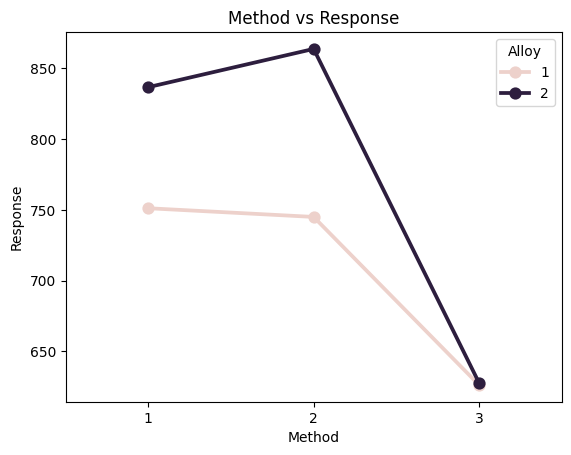

In [ ]:
sns.pointplot(data=df1, x='Method', y='Response',hue='Alloy',ci=False) #dentist vs response
plt.title('Method vs Response')
plt.show()

### Alloy1

H0: The mean hardness of implants is the same across all implant methods.

H1: The mean hardness of implants differs amoung implant methods

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(Alloy1[Alloy1['Method']==1]['Response'],
                            Alloy1[Alloy1['Method']==2]['Response'],
                                  Alloy1[Alloy1['Method']==3]['Response'])
print('The p-value is', p_value)

The p-value is 0.0034160381460233975


Since the p-value is less than the 5% significance level, we  reject the null hypothesis of homogeneity of variances.

#### one Way ANOVA

In [ ]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [ ]:
formula = 'Response ~ C(Method)'
model = ols(formula, Alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


P value is less than siginificance value hence, we do have enough evidence to say Mean hardness same for all implants. ie we reject the null hyposthesis against alternative hypothesis

### Multiple Comparison test (Tukey HSD)


In order to identify for which Method mean dental hardness is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [ ]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = Alloy1['Response'], groups = Alloy1['Method'], alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


### Insight

As the p-values (refer to the p-adj column) for comparing the mean dental hardness for the pair Method 1 & 3 and Method 2 & 3 is less than the significance level, the null hypothesis of equality of all population means can be rejected.

Thus, we can say that the mean dental hardness for methods 1 and 2 is similar but emission for dental hardness for Method 3 is significantly different from Method 1 and 2.

### Alloy2

H0: The mean hardness of implants is the same across all implant methods.

H1: The mean hardness of implants differs among implant methods

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(Alloy2[Alloy2['Method']==1]['Response'],
                            Alloy2[Alloy2['Method']==2]['Response'],
                                  Alloy2[Alloy2['Method']==3]['Response'])
print('The p-value is', p_value)

The p-value is 0.04469269939158668


Since the p-value is less than the 5% significance level, we  reject the null hypothesis of homogeneity of variances.

#### one Way ANOVA

In [ ]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [ ]:
formula = 'Response ~ C(Method)'
model = ols(formula, Alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


P value is less than siginificance value hence, we do have enough evidence to say Mean hardness same for all implants. ie we reject the null hyposthesis against alternative hypothesis

### Multiple Comparison test (Tukey HSD)


In order to identify for which fuel type mean carbon emission is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [ ]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = Alloy2['Response'], groups = Alloy2['Method'], alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


### Insight

As the p-values (refer to the p-adj column) for comparing the mean dental hardness for the pair Method 1 & 3 and Method 2 & 3 is less than the significance level, the null hypothesis of equality of all population means can be rejected.

Thus, we can say that the mean dental hardness for methods 1 and 2 is similar but emission for dental hardness for Method 3 is significantly different from Method 1 and 2.

## 4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?


In [ ]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [ ]:
formula = 'Response ~ C(Dentist)+C(Method)+ C(Dentist):C(Method) '
model = ols(formula, Alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


### Interation plot Alloy 1

Text(0.5, 1.0, 'Interaction Plot for Alloy1')

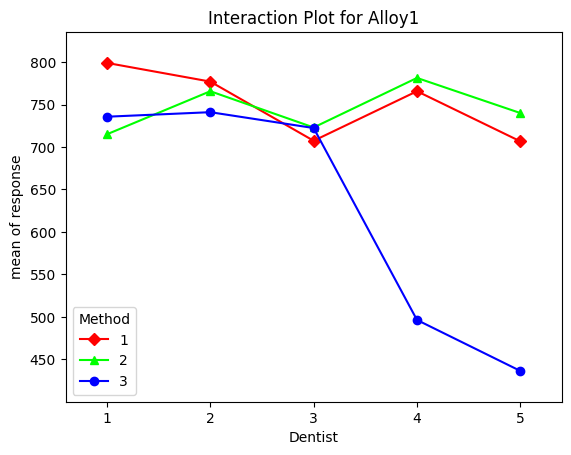

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(Alloy1['Dentist']),np.array(Alloy1['Method']),np.array(Alloy1['Response']),markers=['D','^','o'],xlabel='Dentist',legendtitle="Method");
plt.title('Interaction Plot for Alloy1')

In [ ]:
formula = 'Response ~ C(Dentist)+C(Method)+ C(Dentist):C(Method)'
model = ols(formula, Alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


### Interation plot Alloy 2

Text(0.5, 1.0, 'Interaction Plot for Alloy2')

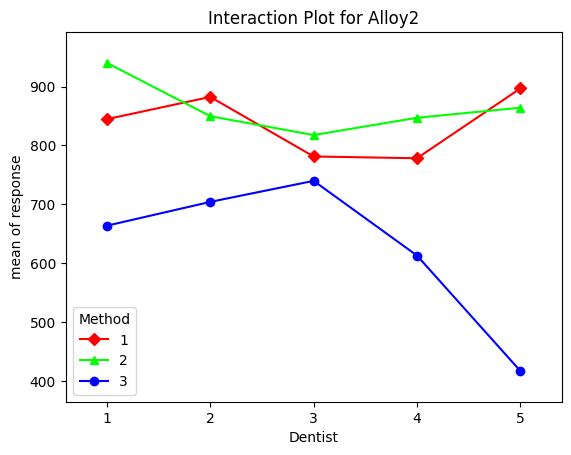

In [43]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(Alloy2['Dentist']),np.array(Alloy2['Method']),np.array(Alloy2['Response']),markers=['D','^','o'],xlabel='Dentist',legendtitle="Method");
plt.title('Interaction Plot for Alloy2')

Hardnes is affected by type of alloy and interaction between method and dentist


## 4.4 How does the hardness of implants vary depending on dentists and methods together?

### Alloy 1



Null Hypothesis (H0):
There is no interaction effect between dentist and method together on the hardness of implants

Alternative Hypothesis (H1):
There is a significant interaction between dentist and method together on the hardness of implants.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
from scipy.stats import levene

In [41]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test
# find the p-value
# Filter the DataFrame for Alloy1


Alloy1['Group'] = Alloy1['Dentist'].astype(str) + '_' + Alloy1['Method'].astype(str)


# Extract unique group combinations
groups = Alloy1['Group'].unique()

# Extract hardness values for each group
group_data = [Alloy1[Alloy1['Group'] == group]['Response'].values for group in groups]
statistic, p_value = levene(*group_data)
print('The p-value is', p_value)


The p-value is 0.3128166652989495


<ipython-input-41-662081f1f2f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alloy1['Group'] = Alloy1['Dentist'].astype(str) + '_' + Alloy1['Method'].astype(str)


Since the p-value is less than the 5% significance level, we  reject the null hypothesis of homogeneity of variances.

In [ ]:
formula = 'Response ~C(Dentist)+ C(Method) + C(Dentist):C(Method) '
model = ols(formula, Alloy1).fit()
aov_table = anova_lm(model,type=2)
print(aov_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


P value less than significance level hence we reject null hypothesis

### Multiple Comparison test (Tukey HSD)


In order to identify for which interaction combination mean dental is different from other groups, the null hypothesis is

  > $𝐻_0: There is no significant interaction between method and dentist on the mean response (dental hardness)

against the alternative hypothesis

 > $𝐻_a: There is a significant interaction between method and dentist on the mean respons

In [ ]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a single grouping column by combining 'Dentist' and 'Method'
Alloy1['Group'] = Alloy1['Dentist'].astype(str) + '_' + Alloy1['Method'].astype(str)

# perform multiple pairwise comparison (Tukey HSD) using the new 'Group' column
m_comp = pairwise_tukeyhsd(endog = Alloy1['Response'], groups = Alloy1['Group'], alpha = 0.05)

# Convert TukeyHSDResults to a DataFrame-compatible format
# Extract data from the TukeyHSDResults object
data = pd.DataFrame(data=m_comp._results_table.data[1:], columns=m_comp._results_table.data[0])

# Now, create the DataFrame
gg = pd.DataFrame(data)
gg[gg['p-adj']<0.05]

<ipython-input-25-924bead7fbdc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alloy1['Group'] = Alloy1['Dentist'].astype(str) + '_' + Alloy1['Method'].astype(str)


,group1,group2,meandiff,p-adj,lower,upper,reject
10,1_1,4_3,-302.6667,0.0070,-551.4950,-53.8383,True
13,1_1,5_3,-362.6667,0.0007,-611.4950,-113.8383,True
26,1_2,5_3,-278.6667,0.0173,-527.4950,-29.8383,True
38,1_3,5_3,-299.3333,0.0079,-548.1617,-50.5050,True
46,2_1,4_3,-280.6667,0.0160,-529.4950,-31.8383,True
49,2_1,5_3,-340.6667,0.0016,-589.4950,-91.8383,True
56,2_2,4_3,-269.3333,0.0243,-518.1617,-20.5050,True
59,2_2,5_3,-329.3333,0.0025,-578.1617,-80.5050,True
68,2_3,5_3,-304.6667,0.0065,-553.4950,-55.8383,True
76,3_1,5_3,-271.0000,0.0229,-519.8283,-22.1717,True


In [ ]:
gg

,group1,group2,meandiff,p-adj,lower,upper,reject
0,1_1,1_2,-84.0000,0.9933,-332.8283,164.8283,False
1,1_1,1_3,-63.3333,0.9996,-312.1617,185.4950,False
2,1_1,2_1,-22.0000,1.0000,-270.8283,226.8283,False
3,1_1,2_2,-33.3333,1.0000,-282.1617,215.4950,False
4,1_1,2_3,-58.0000,0.9999,-306.8283,190.8283,False
...,...,...,...,...,...,...,...
100,4_3,5_2,243.6667,0.0596,-5.1617,492.4950,False
101,4_3,5_3,-60.0000,0.9998,-308.8283,188.8283,False
102,5_1,5_2,33.3333,1.0000,-215.4950,282.1617,False
103,5_1,5_3,-270.3333,0.0234,-519.1617,-21.5050,True


### Insight

As the p-values (refer to the p-adj column) for comparing the mean dental hardness for the pair Method 1 & 3 and Method 2 & 3 is less than the significance level, the null hypothesis of equality of all population means can be rejected.

Thus, we can say that the mean dental hardness for methods 1 and 2 is similar but emission for dental hardness for Method 3 is significantly different from Method 1 and 2.

### Alloy 2



Null Hypothesis (H0):
There is no interaction effect between dentist and method together on the hardness of implants

Alternative Hypothesis (H1):
There is a significant interaction between dentist and method together on the hardness of implants.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [42]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test
# find the p-value
# Filter the DataFrame for Alloy2


Alloy2['Group'] = Alloy2['Dentist'].astype(str) + '_' + Alloy2['Method'].astype(str)


# Extract unique group combinations
groups = Alloy2['Group'].unique()

# Extract hardness values for each group
group_data = [Alloy2[Alloy2['Group'] == group]['Response'].values for group in groups]
statistic, p_value = levene(*group_data)
print('The p-value is', p_value)

The p-value is 0.7831735515657826


<ipython-input-42-f910283082a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alloy2['Group'] = Alloy2['Dentist'].astype(str) + '_' + Alloy2['Method'].astype(str)


In [ ]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test
# find the p-value
# Filter the DataFrame for Alloy2
Alloy2 = df1[df1['Alloy'] == 2] # Change 'Alloy1' to 1 to match data

# Ensure you have enough data for the test
if len(Alloy2['Dentist'].unique()) >= 5 and len(Alloy2['Method'].unique()) >= 3:
  statistic, p_value = stats.levene(Alloy2[Alloy2['Method']==1]['Response'],
                            Alloy2[Alloy2['Method']==2]['Response'],
                            Alloy2[Alloy2['Method']==3]['Response'])
  print('The p-value is', p_value)
else:
  print("Insufficient data for Levene's test for Alloy2.") # Handle cases with insufficient data

The p-value is 0.04469269939158668


Since the p-value is less than the 5% significance level, we  reject the null hypothesis of homogeneity of variances.

In [44]:
formula = 'Response ~C(Dentist)+ C(Method) + C(Dentist):C(Method) '
model = ols(formula, Alloy2).fit()
aov_table = anova_lm(model,type=2)
print(aov_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


P value greater than significance level hence we accept null hypothesis